<a href="https://colab.research.google.com/github/NervOUs11/Predict_CocaCola_Stock/blob/main/Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

# For use DataReader in pandas
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [3]:
#Load Data 
company = 'KO'

start = '2012-01-01'
end = '2022-01-01'

data = pdr.DataReader(company,'yahoo',start,end)

#Show
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,35.355000,35.049999,35.075001,35.070000,15639600.0,25.078632
2012-01-04,35.035000,34.750000,34.955002,34.849998,14239200.0,24.921305
2012-01-05,34.935001,34.674999,34.880001,34.685001,14287600.0,24.803318
2012-01-06,34.814999,34.310001,34.735001,34.465000,13646600.0,24.646000
2012-01-09,34.584999,34.400002,34.500000,34.465000,10522600.0,24.646000
...,...,...,...,...,...,...
2021-12-27,58.689999,58.000000,58.000000,58.650002,9860000.0,57.368687
2021-12-28,58.939999,58.299999,58.400002,58.880001,8979900.0,57.593662
2021-12-29,59.099998,58.660000,58.950001,58.950001,9996000.0,57.662132


In [4]:
# Get the number of rows and columns in the data set
data.shape

(2517, 6)

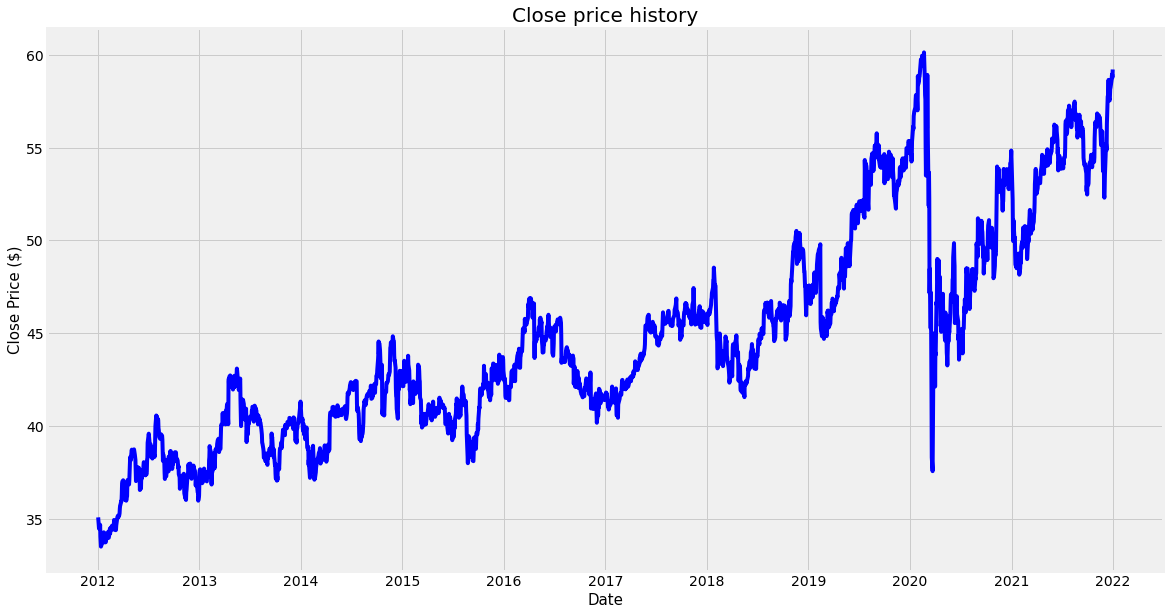

In [5]:
#Visualize the closing price
plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')
plt.title('Close price history',fontsize=20)
plt.plot(data['Close'], color='blue')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price ($)',fontsize=15)
plt.show()

In [6]:
#Prepare data

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

scaled_data

array([[0.05913274],
       [0.05087289],
       [0.04467814],
       ...,
       [0.95569738],
       [0.94931473],
       [0.96545891]])

In [7]:
#Create attribute(x) and label(y)
prediction_days = 60

x_train = [] #Attribute
y_train = [] #Label

for i in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[i-prediction_days:i, 0])
  y_train.append(scaled_data[i, 0])


# Convert the x_train and y_train to numpy arrays
x_train , y_train = np.array(x_train) , np.array(y_train)

In [8]:
#Show Attribute
x_train

array([[0.05913274, 0.05087289, 0.04467814, ..., 0.09217202, 0.09160887,
        0.106439  ],
       [0.05087289, 0.04467814, 0.03641829, ..., 0.09160887, 0.106439  ,
        0.12802702],
       [0.04467814, 0.03641829, 0.03641829, ..., 0.106439  , 0.12802702,
        0.13178156],
       ...,
       [0.73193171, 0.73531073, 0.75896371, ..., 0.92828986, 0.94443404,
        0.95306927],
       [0.73531073, 0.75896371, 0.76534637, ..., 0.94443404, 0.95306927,
        0.95569738],
       [0.75896371, 0.76534637, 0.77435699, ..., 0.95306927, 0.95569738,
        0.94931473]])

In [9]:
#Show Label
y_train

array([0.12802702, 0.13178156, 0.13422191, ..., 0.95569738, 0.94931473,
       0.96545891])

In [10]:
#Show dimension
x_train.shape

(2457, 60)

In [11]:
#Reshape the data 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(2457, 60, 1)

In [12]:
#Build the model
model = Sequential()
model.add(LSTM(60, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(60, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(60))
model.add(Dropout(0.2))
model.add(Dense(40))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#Train the model
model.fit(x_train, y_train, batch_size=10, epochs=30)

Epoch 1/30
246/246 [==============================] - 27s 86ms/step - loss: 0.0086 - accuracy: 4.0700e-04
Epoch 2/30
246/246 [==============================] - 21s 84ms/step - loss: 0.0033 - accuracy: 4.0700e-04
Epoch 3/30
246/246 [==============================] - 25s 103ms/step - loss: 0.0027 - accuracy: 4.0700e-04
Epoch 4/30
246/246 [==============================] - 20s 81ms/step - loss: 0.0022 - accuracy: 4.0700e-04
Epoch 5/30
246/246 [==============================] - 21s 86ms/step - loss: 0.0018 - accuracy: 4.0700e-04
Epoch 6/30
246/246 [==============================] - 20s 82ms/step - loss: 0.0018 - accuracy: 4.0700e-04
Epoch 7/30
246/246 [==============================] - 22s 89ms/step - loss: 0.0016 - accuracy: 4.0700e-04
Epoch 8/30
246/246 [==============================] - 21s 86ms/step - loss: 0.0015 - accuracy: 4.0700e-04
Epoch 9/30
246/246 [==============================] - 20s 82ms/step - loss: 0.0015 - accuracy: 4.0700e-04
Epoch 10/30
246/246 [========================

In [13]:
#Load test data
test_start = '2020,01,01'
test_end =  dt.datetime.now()

test_data = pdr.DataReader(company, 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

In [14]:
#Make predictions on test data
x_test = []

for i in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[i-prediction_days:i, 0])

#Convert the data to numpy array
x_test = np.array(x_test)
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#Model predicted price values
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

23/23 [==============================] - 3s 52ms/step


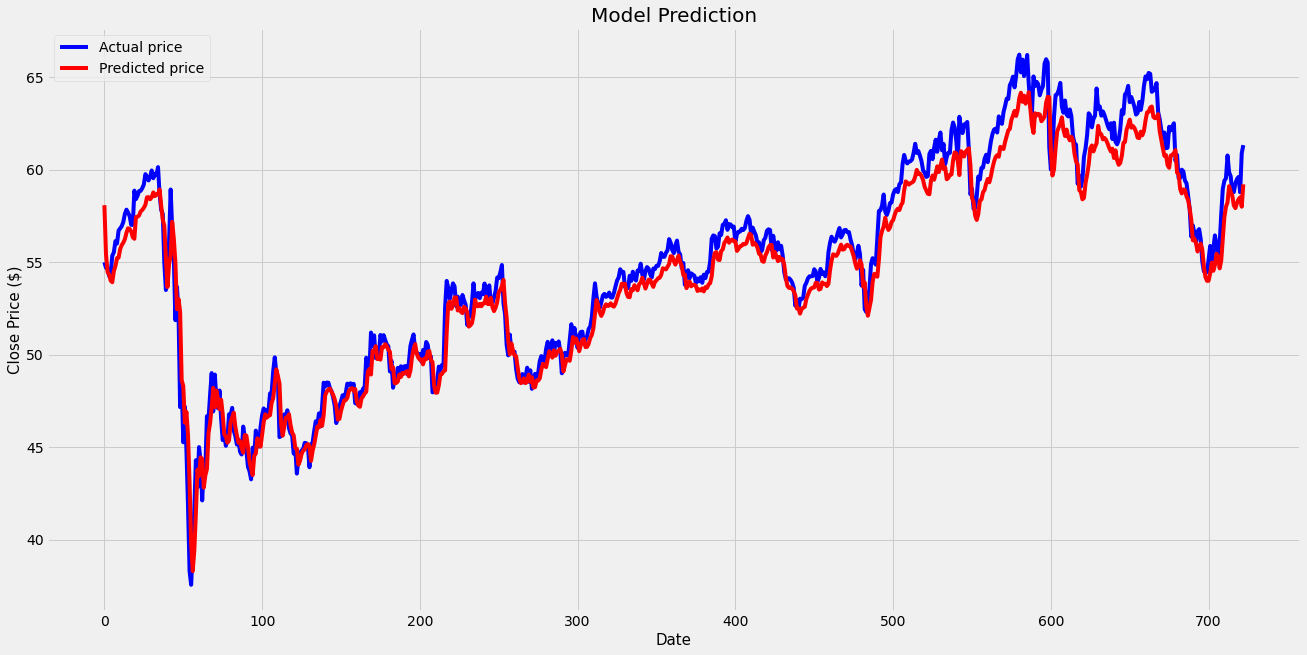

In [15]:
#Plot the test predictions
plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')
plt.title('Model Prediction',fontsize=20)
plt.plot(actual_prices, color='blue')
plt.plot(predicted_prices, color='red')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price ($)',fontsize=15)
plt.legend(['Actual price','Predicted price'])
plt.show()

In [16]:
#Check the accuracy of predictions.
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("Mean absolute error =" , mean_absolute_error(actual_prices, predicted_prices))
print("Mean squared error =" , mean_squared_error(actual_prices, predicted_prices))

Mean absolute error = 0.9570229452510427
Mean squared error = 1.4233774219663833


In [17]:
print("Real price is", actual_prices[-1:])
print("Predicted price is", predicted_prices[-1:])

Real price is [61.31999969]
Predicted price is [[59.19945]]


In [ ]:
test_data_table = test_data.filter(['Close'])
checkPrice_table = test_data_table[:test_end]
checkPrice_table['Prediction'] = predicted_prices

In [19]:
checkPrice_table

,Close,Prediction
Date,,
2020-01-02,54.990002,58.073170
2020-01-03,54.689999,55.437469
2020-01-06,54.669998,54.469261
2020-01-07,54.250000,54.324272
2020-01-08,54.349998,53.993443
...,...,...
2022-11-07,59.490002,58.192982
2022-11-08,59.599998,58.395905
2022-11-09,58.770000,58.496613
